In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload= files.upload()

Saving Concrete Compressive Strength.csv to Concrete Compressive Strength.csv


In [3]:
data= pd.read_csv('Concrete Compressive Strength.csv')

In [4]:
data.fillna(data.median(), inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

<ipython-input-6-459e18e75f45>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-6-459e18e75f45>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-6-459e18e75f45>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

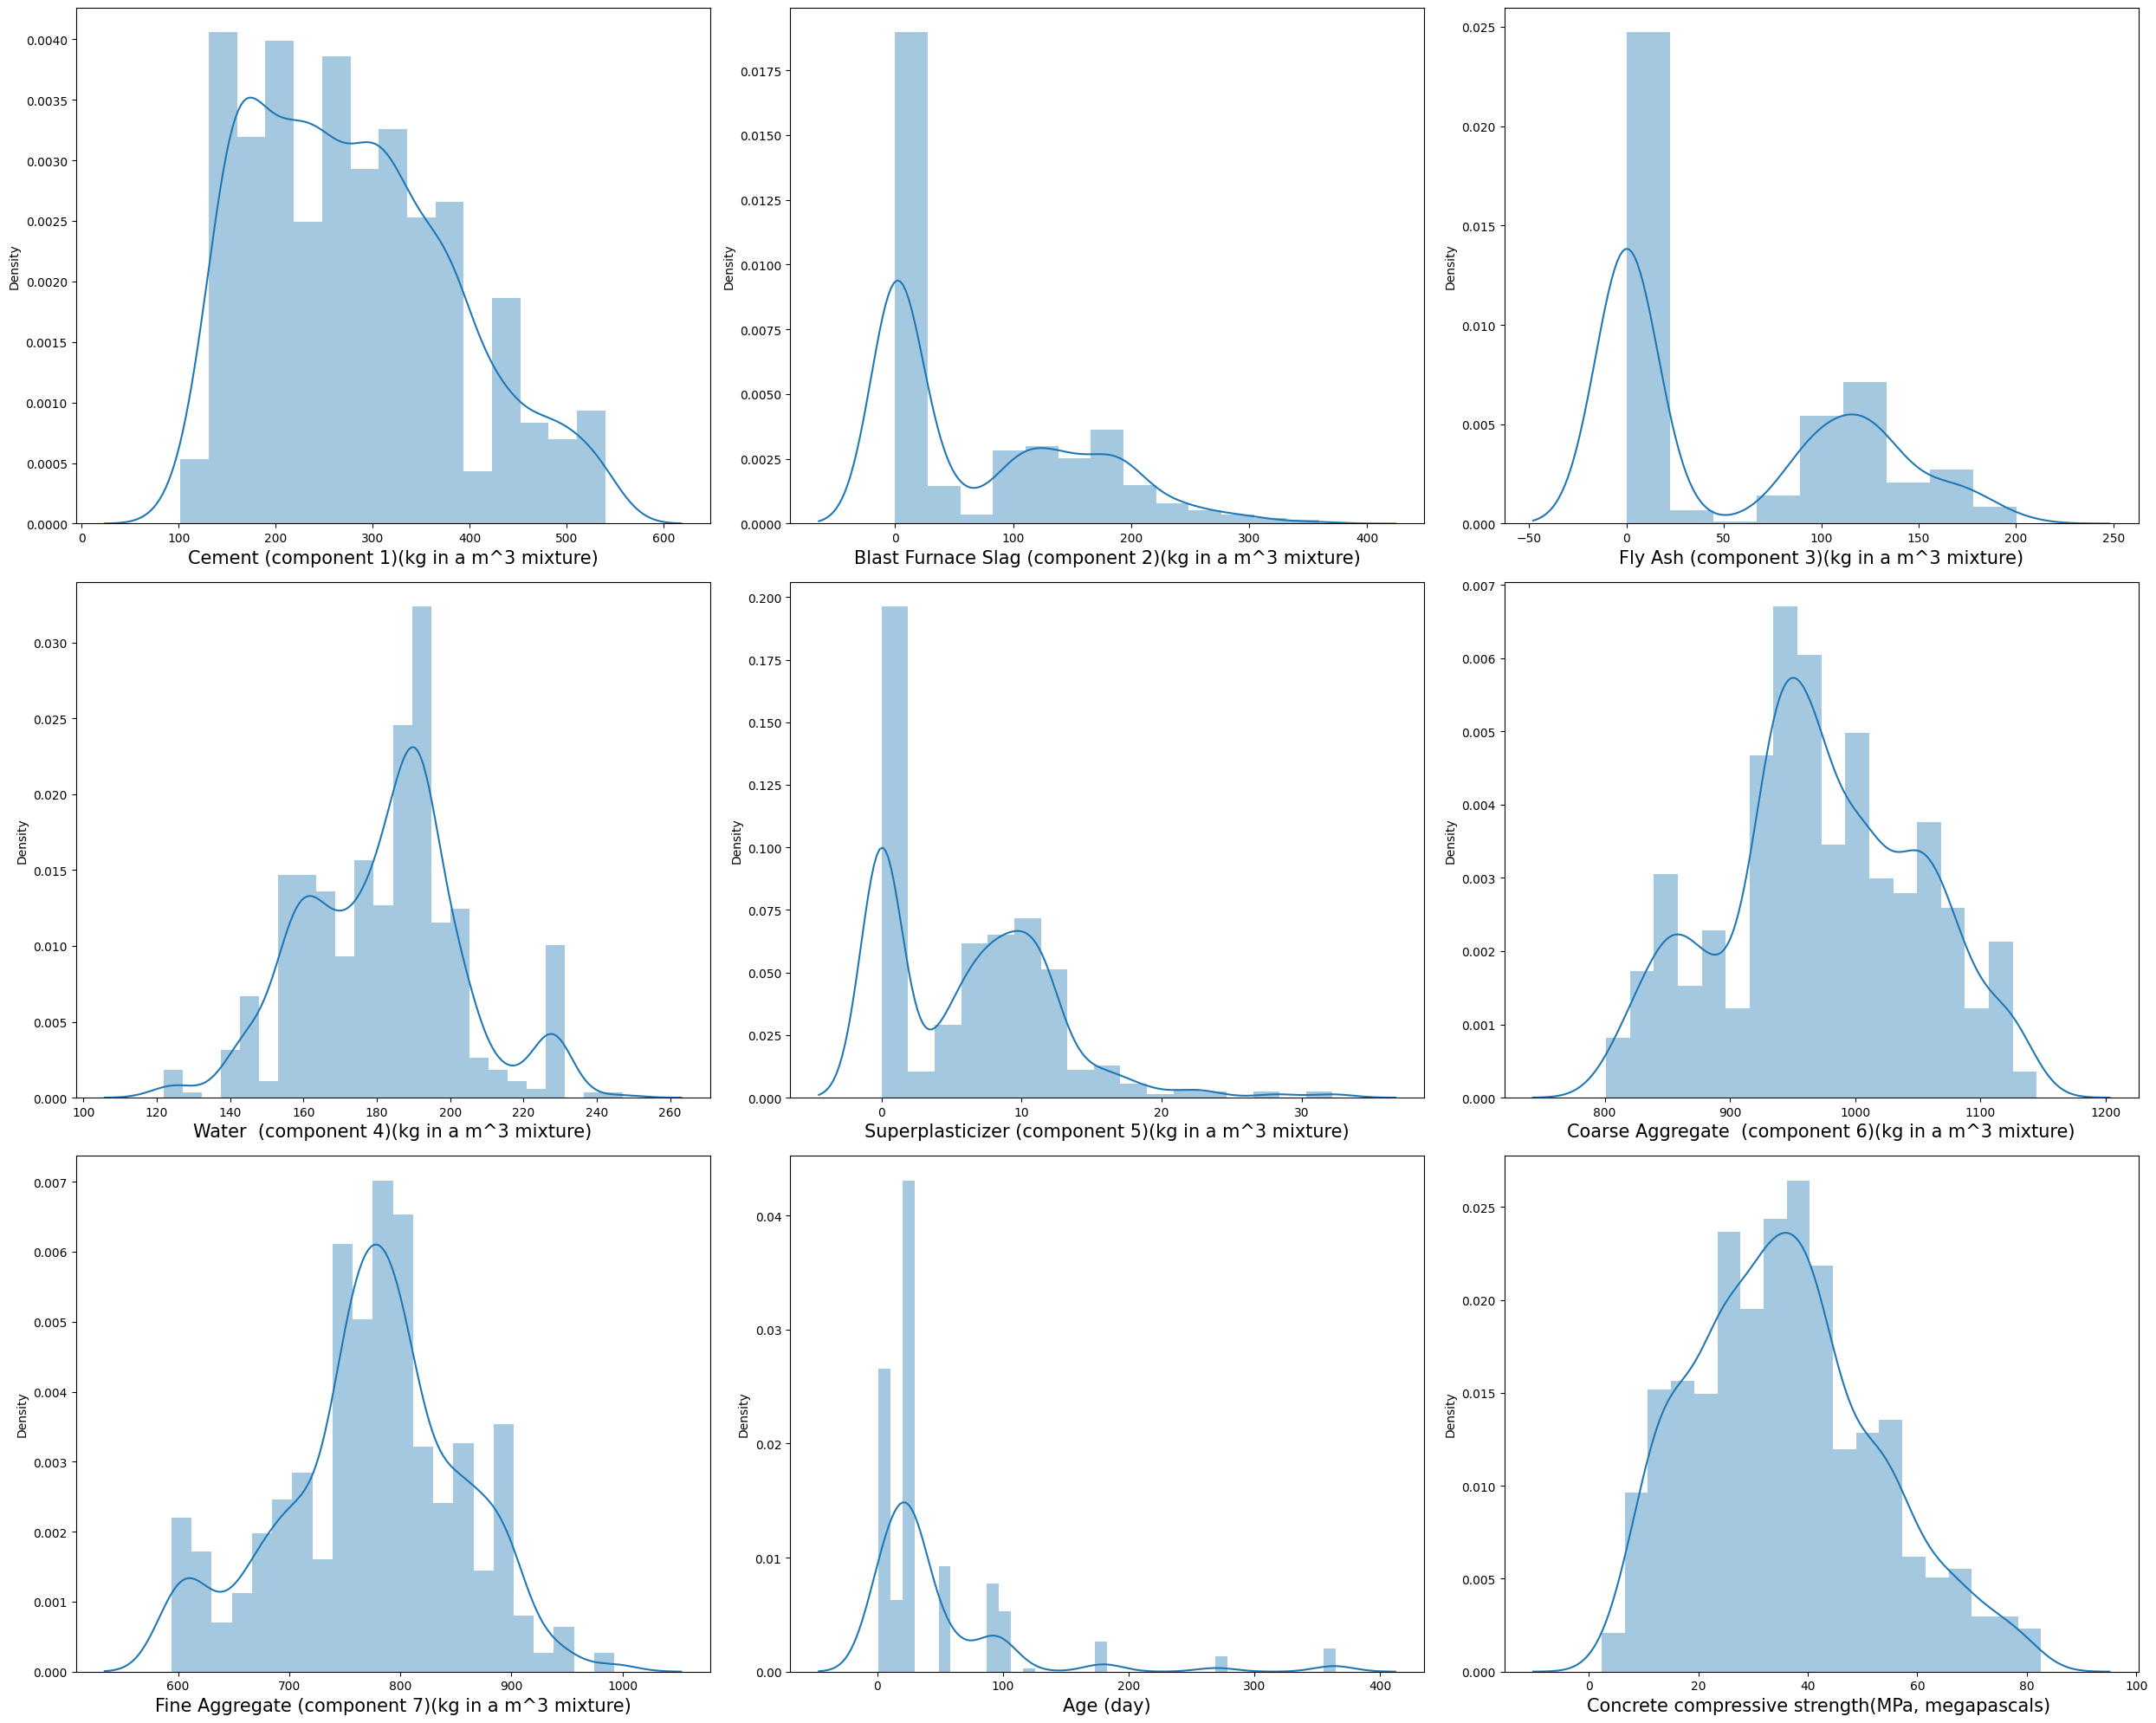

In [6]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()


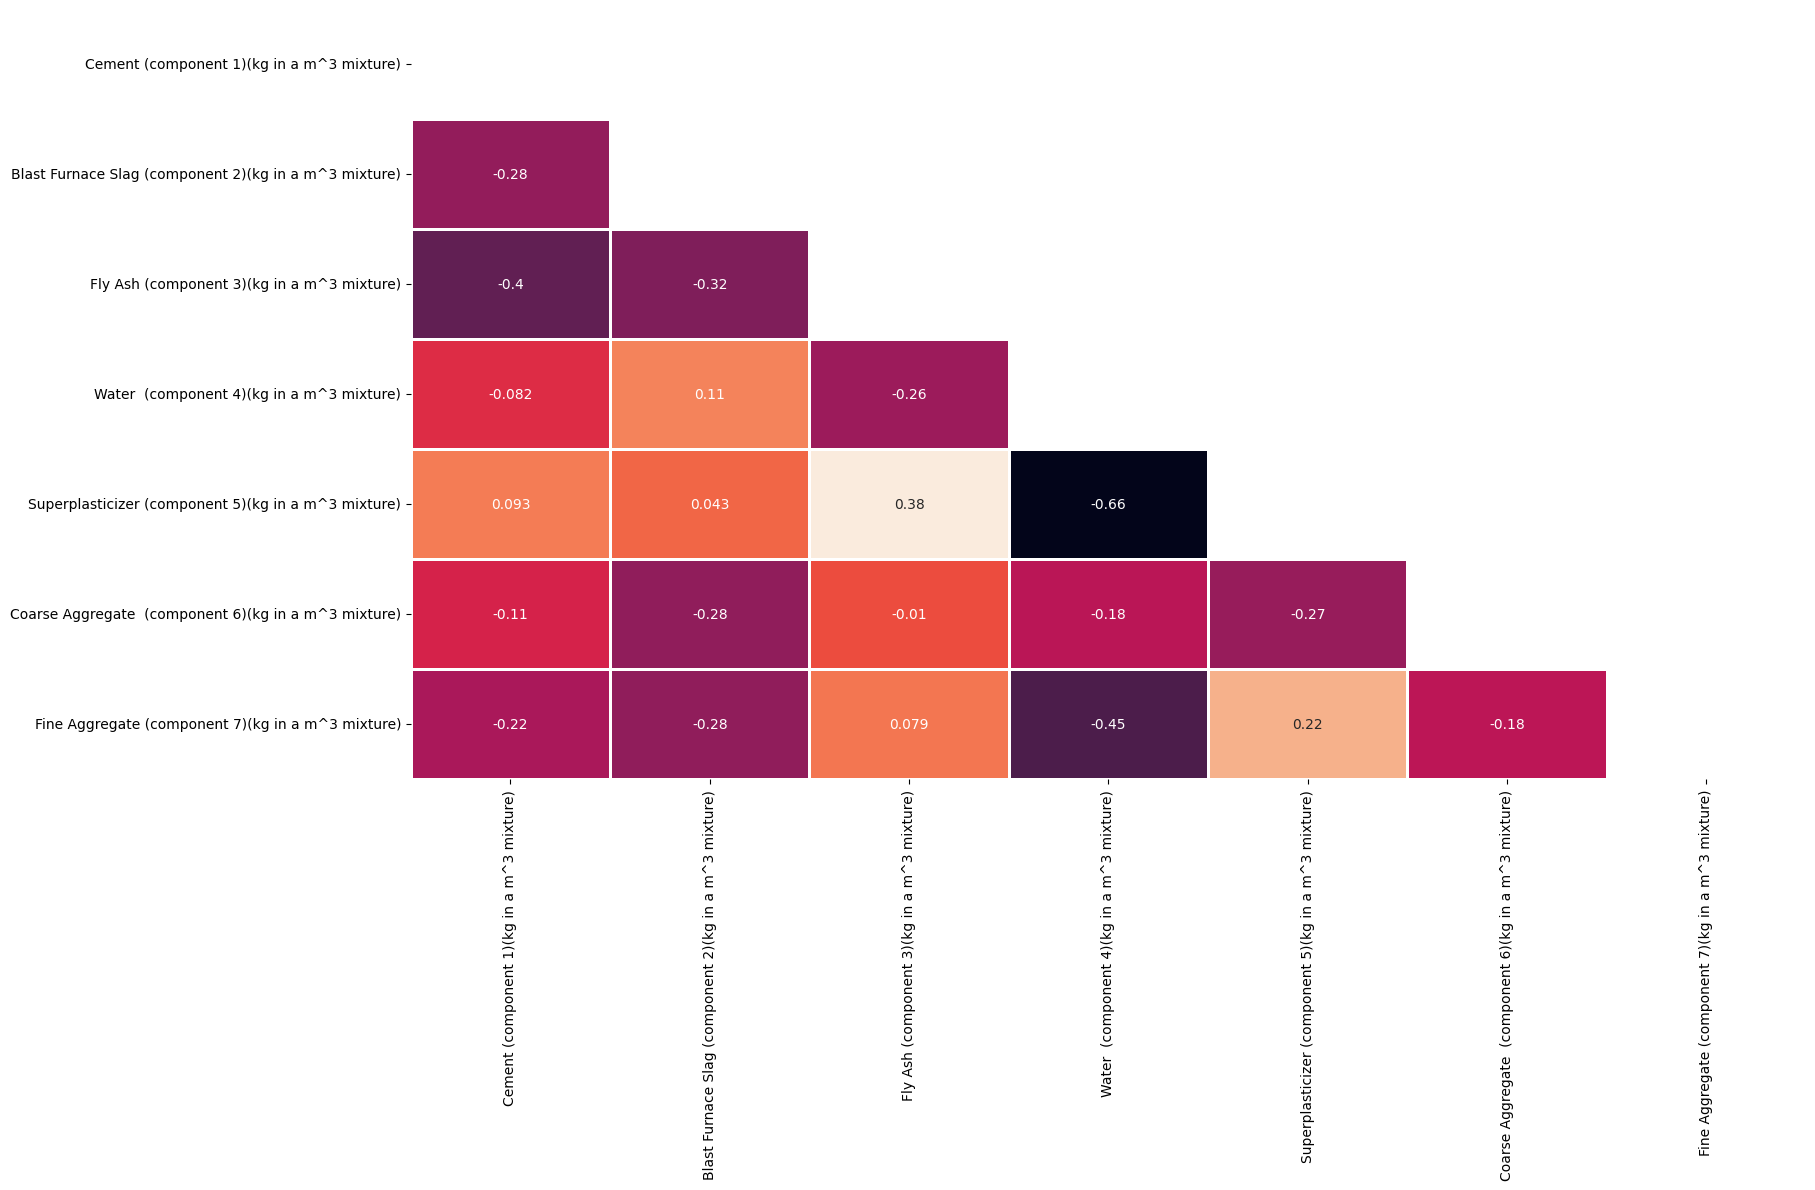

In [ ]:
plt.figure(figsize = (18, 10))

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

In [ ]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) ','Age (day)'], axis=1)
y_strength = data['Concrete compressive strength(MPa, megapascals) ']
y_age = data['Age (day)']

In [ ]:
X_train, X_test, y_train_strength, y_test_strength, y_train_age, y_test_age = train_test_split(X, y_strength, y_age, test_size=0.2, random_state=42)

In [ ]:
def train_model_with_tuning(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [ ]:
linear_strength_model = LinearRegression()
random_forest_strength_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
random_forest_strength_model = train_model_with_tuning(RandomForestRegressor(random_state=42), random_forest_strength_params, X_train, y_train_strength)
decision_tree_strength_params = {'max_depth': [None, 10, 20]}
decision_tree_strength_model = train_model_with_tuning(DecisionTreeRegressor(random_state=42), decision_tree_strength_params, X_train, y_train_strength)
ada_boost_strength_params = {'n_estimators': [50, 100, 150]}
ada_boost_strength_model = train_model_with_tuning(AdaBoostRegressor(random_state=42), ada_boost_strength_params, X_train, y_train_strength)
xg_boost_strength_params = {'n_estimators': [50, 100, 150]}
xg_boost_strength_model = train_model_with_tuning(XGBRegressor(random_state=42), xg_boost_strength_params, X_train, y_train_strength)

In [ ]:
linear_age_model = LinearRegression()
random_forest_age_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
random_forest_age_model = train_model_with_tuning(RandomForestRegressor(random_state=42), random_forest_age_params, X_train, y_train_age)
decision_tree_age_params = {'max_depth': [None, 10, 20]}
decision_tree_age_model = train_model_with_tuning(DecisionTreeRegressor(random_state=42), decision_tree_age_params, X_train, y_train_age)
ada_boost_age_params = {'n_estimators': [50, 100, 150]}
ada_boost_age_model = train_model_with_tuning(AdaBoostRegressor(random_state=42), ada_boost_age_params, X_train, y_train_age)
xg_boost_age_params = {'n_estimators': [50, 100, 150]}
xg_boost_age_model = train_model_with_tuning(XGBRegressor(random_state=42), xg_boost_age_params, X_train, y_train_age)


In [ ]:
def cross_val_eval(model, X, y):
    mse_scores = -1 * cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return rmse_scores, r2_scores

In [ ]:
models_strength = [
    ("Linear Regression", linear_strength_model),
    ("Random Forest", random_forest_strength_model),
    ("Decision Tree", decision_tree_strength_model),
    ("AdaBoost", ada_boost_strength_model),
    ("XGBoost", xg_boost_strength_model)]

In [ ]:
models_age = [
    ("Linear Regression", linear_age_model),
    ("Random Forest", random_forest_age_model),
    ("Decision Tree", decision_tree_age_model),
    ("AdaBoost", ada_boost_age_model),
    ("XGBoost", xg_boost_age_model)]

In [ ]:
rmse_strength_list = []
r2_strength_list = []

In [ ]:
for model_name, model in models_strength:
    rmse_strength, r2_strength = cross_val_eval(model, X_train, y_train_strength)
    rmse_strength_list.append(rmse_strength)
    r2_strength_list.append(r2_strength)

In [ ]:
rmse_age_list = []
r2_age_list = []

In [ ]:
for model_name, model in models_age:
    rmse_age, r2_age = cross_val_eval(model, X_train, y_train_age)
    rmse_age_list.append(rmse_age)
    r2_age_list.append(r2_age)

In [ ]:
strength_metrics_table = pd.DataFrame({
    "Model": [model_name for model_name, _ in models_strength],
    "RMSE": [np.mean(rmse) for rmse in rmse_strength_list],
    "R2 Score": [np.mean(r2) for r2 in r2_strength_list]
})
age_metrics_table = pd.DataFrame({
    "Model": [model_name for model_name, _ in models_age],
    "RMSE": [np.mean(rmse) for rmse in rmse_age_list],
    "R2 Score": [np.mean(r2) for r2 in r2_age_list]
})

In [ ]:
print("Strength Prediction Metrics:")
print(strength_metrics_table)

print("\nAge Prediction Metrics:")
print(age_metrics_table)

Strength Prediction Metrics:
               Model       RMSE  R2 Score
0  Linear Regression  12.629521  0.430289
1      Random Forest  13.040627  0.395304
2      Decision Tree  14.025061  0.298098
3           AdaBoost  12.336127  0.459563
4            XGBoost  13.673424  0.334925

Age Prediction Metrics:
               Model       RMSE  R2 Score
0  Linear Regression  58.079210  0.044139
1      Random Forest  62.227815 -0.115154
2      Decision Tree  63.727479 -0.173280
3           AdaBoost  56.991760  0.065601
4            XGBoost  64.178631 -0.187708
